In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Dataset infos

In [5]:
data = pd.read_csv('shopping_behavior_updated.csv')
df = pd.DataFrame(data)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
# check null value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
# check duplicates
value=len(df[df.duplicated()])
print(value) 

0


In [9]:
# Describe numerical column 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [11]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la corrélation sur le DataFrame filtré
corr_matrix = df_numeric.corr()

# Afficher la matrice de corrélation
print(corr_matrix)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


## Customer analysis

Text(0.5, 1.0, 'Number of order per gender')

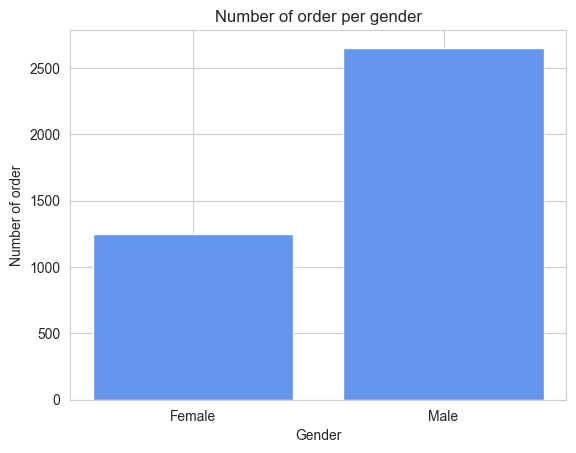

In [12]:
gender = df.groupby('Gender')['Item Purchased'].count().reset_index()
plt.bar(gender['Gender'], gender['Item Purchased'], color='cornflowerblue')
plt.xlabel('Gender')
plt.ylabel('Number of order')
plt.title('Number of order per gender')

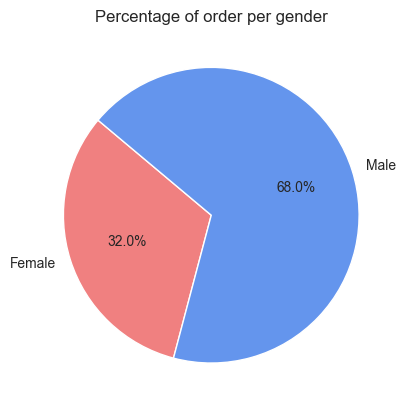

In [13]:
plt.pie(gender['Item Purchased'], labels=gender['Gender'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'cornflowerblue'])
plt.title('Percentage of order per gender')
plt.show()

C:\Users\hugue\AppData\Local\Temp\ipykernel_18828\640720240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette="Blues")


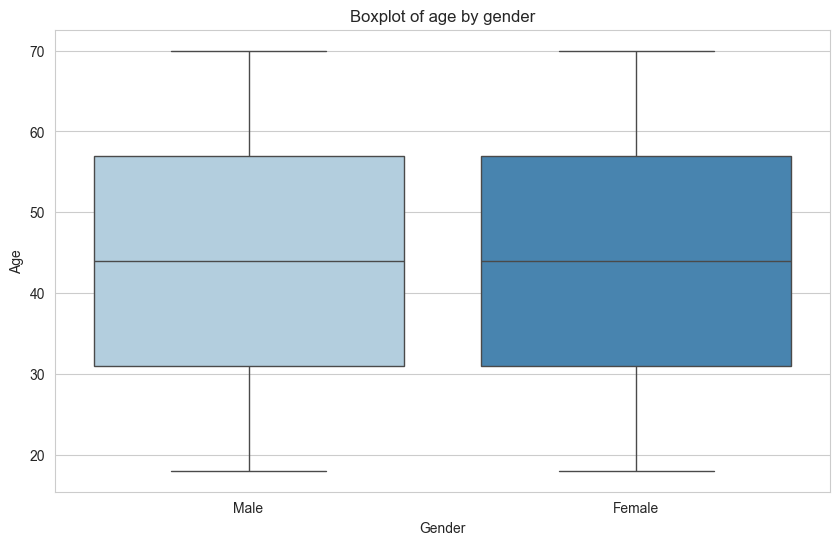

In [14]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Gender', y='Age', data=df, palette="Blues")
plt.title('Boxplot of age by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Average purchase amount per subscription status')

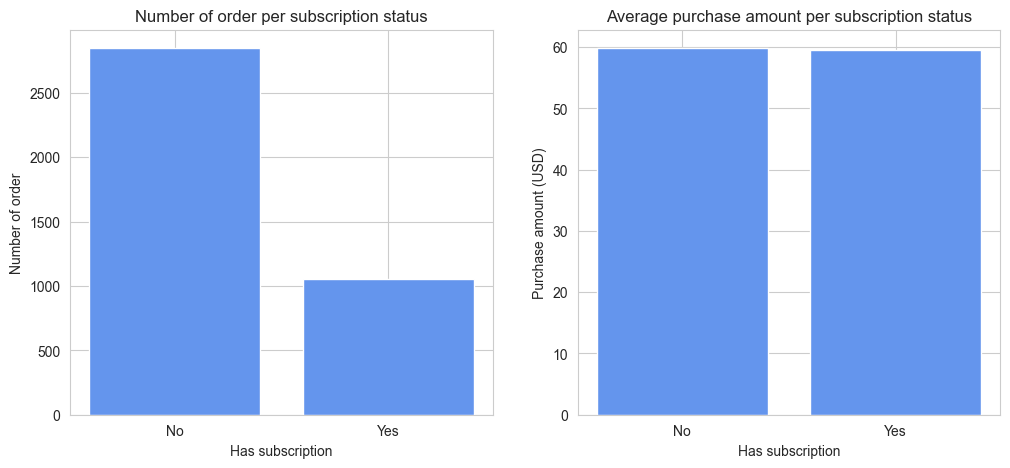

In [15]:
subscription_order = df.groupby('Subscription Status')['Item Purchased'].count().reset_index()
subscription_amount = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize= (12,5))

ax[0].bar(subscription_order['Subscription Status'], subscription_order['Item Purchased'], color='cornflowerblue')
ax[0].set_xlabel('Has subscription')
ax[0].set_ylabel('Number of order')
ax[0].set_title('Number of order per subscription status')

ax[1].bar(subscription_amount['Subscription Status'], subscription_amount['Purchase Amount (USD)'], color='cornflowerblue')
ax[1].set_xlabel('Has subscription')
ax[1].set_ylabel('Purchase amount (USD)')
ax[1].set_title('Average purchase amount per subscription status')

## Item analysis

Text(0.5, 1.0, 'Number of order per category')

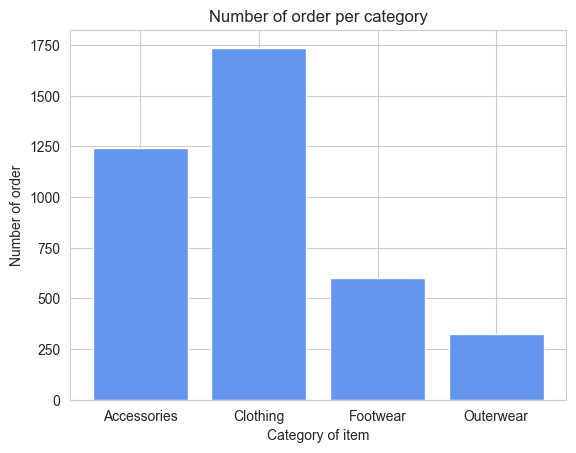

In [16]:
category_item = df.groupby('Category')['Item Purchased'].count().reset_index()
plt.bar(category_item['Category'], category_item['Item Purchased'], color='cornflowerblue')
plt.xlabel('Category of item')
plt.ylabel('Number of order')
plt.title('Number of order per category')

Text(0.5, 1.0, 'Number of order per item')

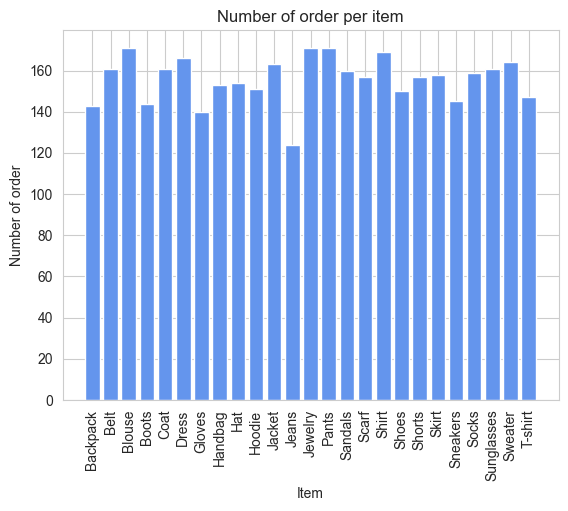

In [17]:
item = df.groupby('Item Purchased')['Category'].count().reset_index()
plt.bar(item['Item Purchased'], item['Category'], color='cornflowerblue')
plt.xlabel('Item')
plt.xticks(rotation=90)
plt.ylabel('Number of order')
plt.title('Number of order per item')

Text(0.5, 1.0, 'Number of order per state')

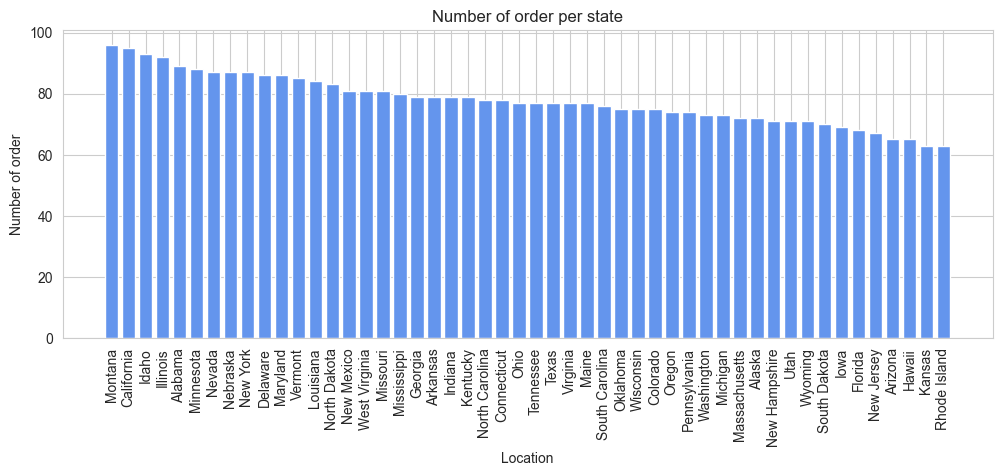

In [18]:
states = df.groupby('Location')['Item Purchased'].count().reset_index()
states.sort_values('Item Purchased', ascending=False, inplace=True)
plt.figure(figsize=(12, 4))
plt.bar(states['Location'], states['Item Purchased'], color='cornflowerblue')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Number of order')
plt.title('Number of order per state')

Text(0.5, 1.0, 'Average purchase amount per state')

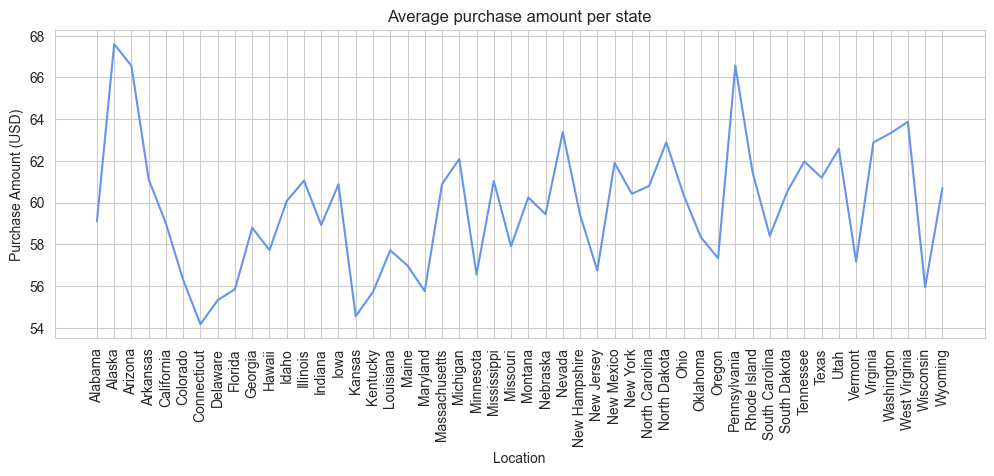

In [19]:
amount_per_state = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(12, 4))
plt.plot(amount_per_state['Location'], amount_per_state['Purchase Amount (USD)'], color='cornflowerblue')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount (USD)')
plt.title('Average purchase amount per state')

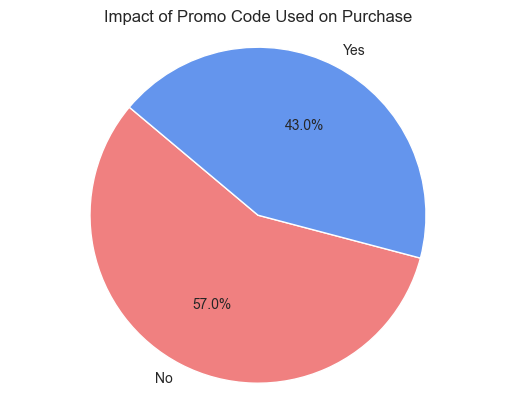

In [20]:
promo_counts = df['Promo Code Used'].value_counts()
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'cornflowerblue'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal') 
plt.show()

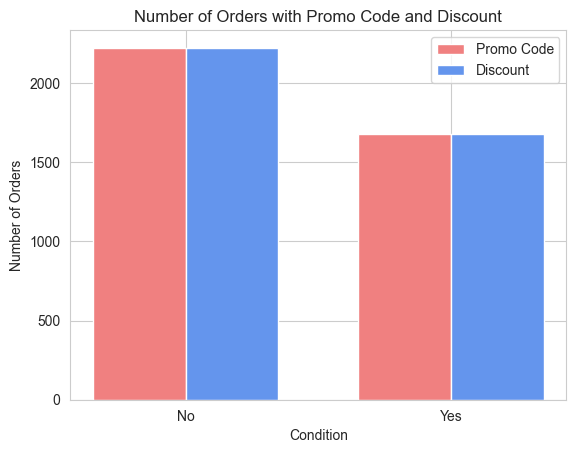

In [21]:
discount = df.groupby('Discount Applied')['Item Purchased'].count().reset_index()
promo_code = df.groupby('Promo Code Used')['Item Purchased'].count().reset_index()

index = np.arange(len(promo_code))
bar_width = 0.35


plt.bar(index, promo_code['Item Purchased'], bar_width, label='Promo Code', color='lightcoral')
plt.bar(index + bar_width, discount['Item Purchased'], bar_width, label='Discount', color='cornflowerblue')
plt.xlabel('Condition')
plt.ylabel('Number of Orders')
plt.title('Number of Orders with Promo Code and Discount')
plt.xticks(index + bar_width / 2, promo_code['Promo Code Used'])
plt.legend()
plt.show()

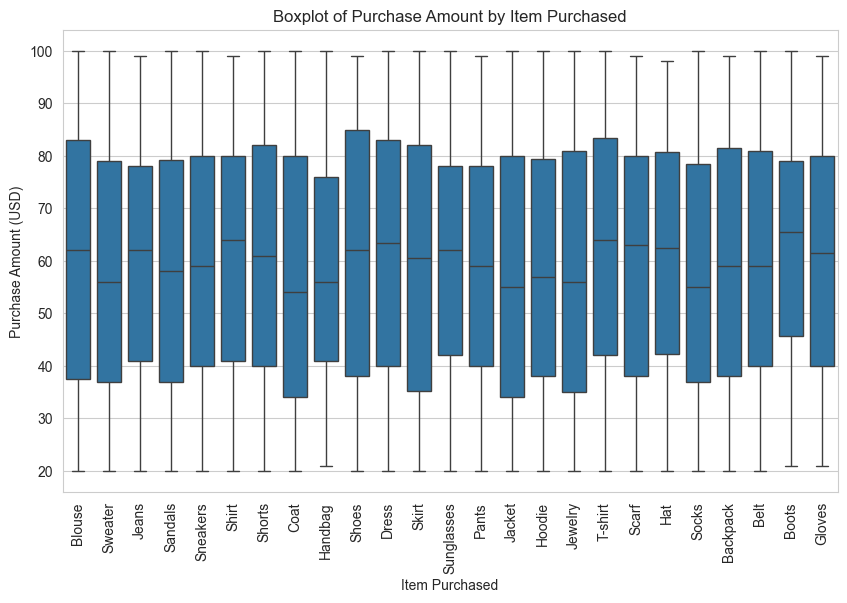

In [22]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Item Purchased', y='Purchase Amount (USD)', data=df)
plt.title('Boxplot of Purchase Amount by Item Purchased')
plt.xlabel('Item Purchased')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount (USD)')
plt.show()

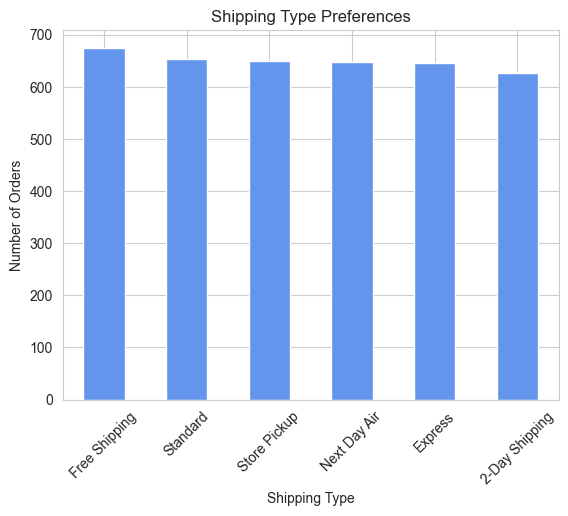

In [23]:
shipping_type_counts = df['Shipping Type'].value_counts()
shipping_type_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Shipping Type Preferences')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

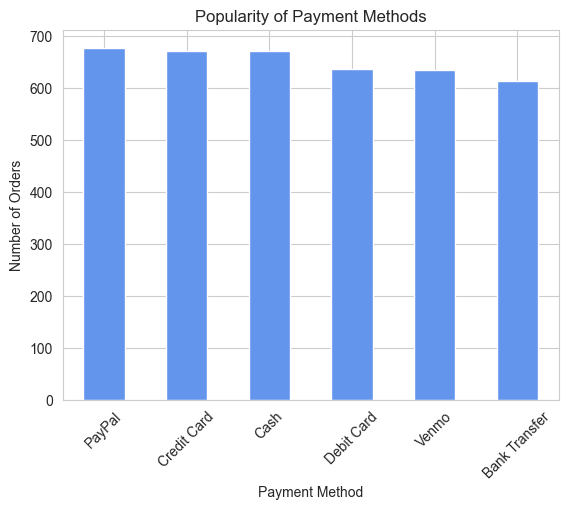

In [24]:
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Location,Item Purchased,Category,Payment Method Analysis:


In [25]:
# Analyzing the distribution of selected categorical variables: Location, Item Purchased, Category, and Payment Method

data = df
# Distribution of 'Location'
location_distribution = data['Location'].value_counts()

# Distribution of 'Item Purchased'
item_purchased_distribution = data['Item Purchased'].value_counts()

# Distribution of 'Category'
category_distribution = data['Category'].value_counts()

# Distribution of 'Payment Method'
payment_method_distribution = data['Payment Method'].value_counts()

location_distribution, item_purchased_distribution, category_distribution, payment_method_distribution

(Location
 Montana           96
 California        95
 Idaho             93
 Illinois          92
 Alabama           89
 Minnesota         88
 Nebraska          87
 New York          87
 Nevada            87
 Maryland          86
 Delaware          86
 Vermont           85
 Louisiana         84
 North Dakota      83
 Missouri          81
 West Virginia     81
 New Mexico        81
 Mississippi       80
 Indiana           79
 Georgia           79
 Kentucky          79
 Arkansas          79
 North Carolina    78
 Connecticut       78
 Virginia          77
 Ohio              77
 Tennessee         77
 Texas             77
 Maine             77
 South Carolina    76
 Colorado          75
 Oklahoma          75
 Wisconsin         75
 Oregon            74
 Pennsylvania      74
 Washington        73
 Michigan          73
 Alaska            72
 Massachusetts     72
 Wyoming           71
 Utah              71
 New Hampshire     71
 South Dakota      70
 Iowa              69
 Florida           68


C:\Users\hugue\AppData\Local\Temp\ipykernel_18828\979494161.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_distribution.values, y=location_distribution.index, ax=axes[0, 0], palette="coolwarm")
C:\Users\hugue\AppData\Local\Temp\ipykernel_18828\979494161.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_purchased_distribution.values, y=item_purchased_distribution.index, ax=axes[0, 1], palette="viridis")


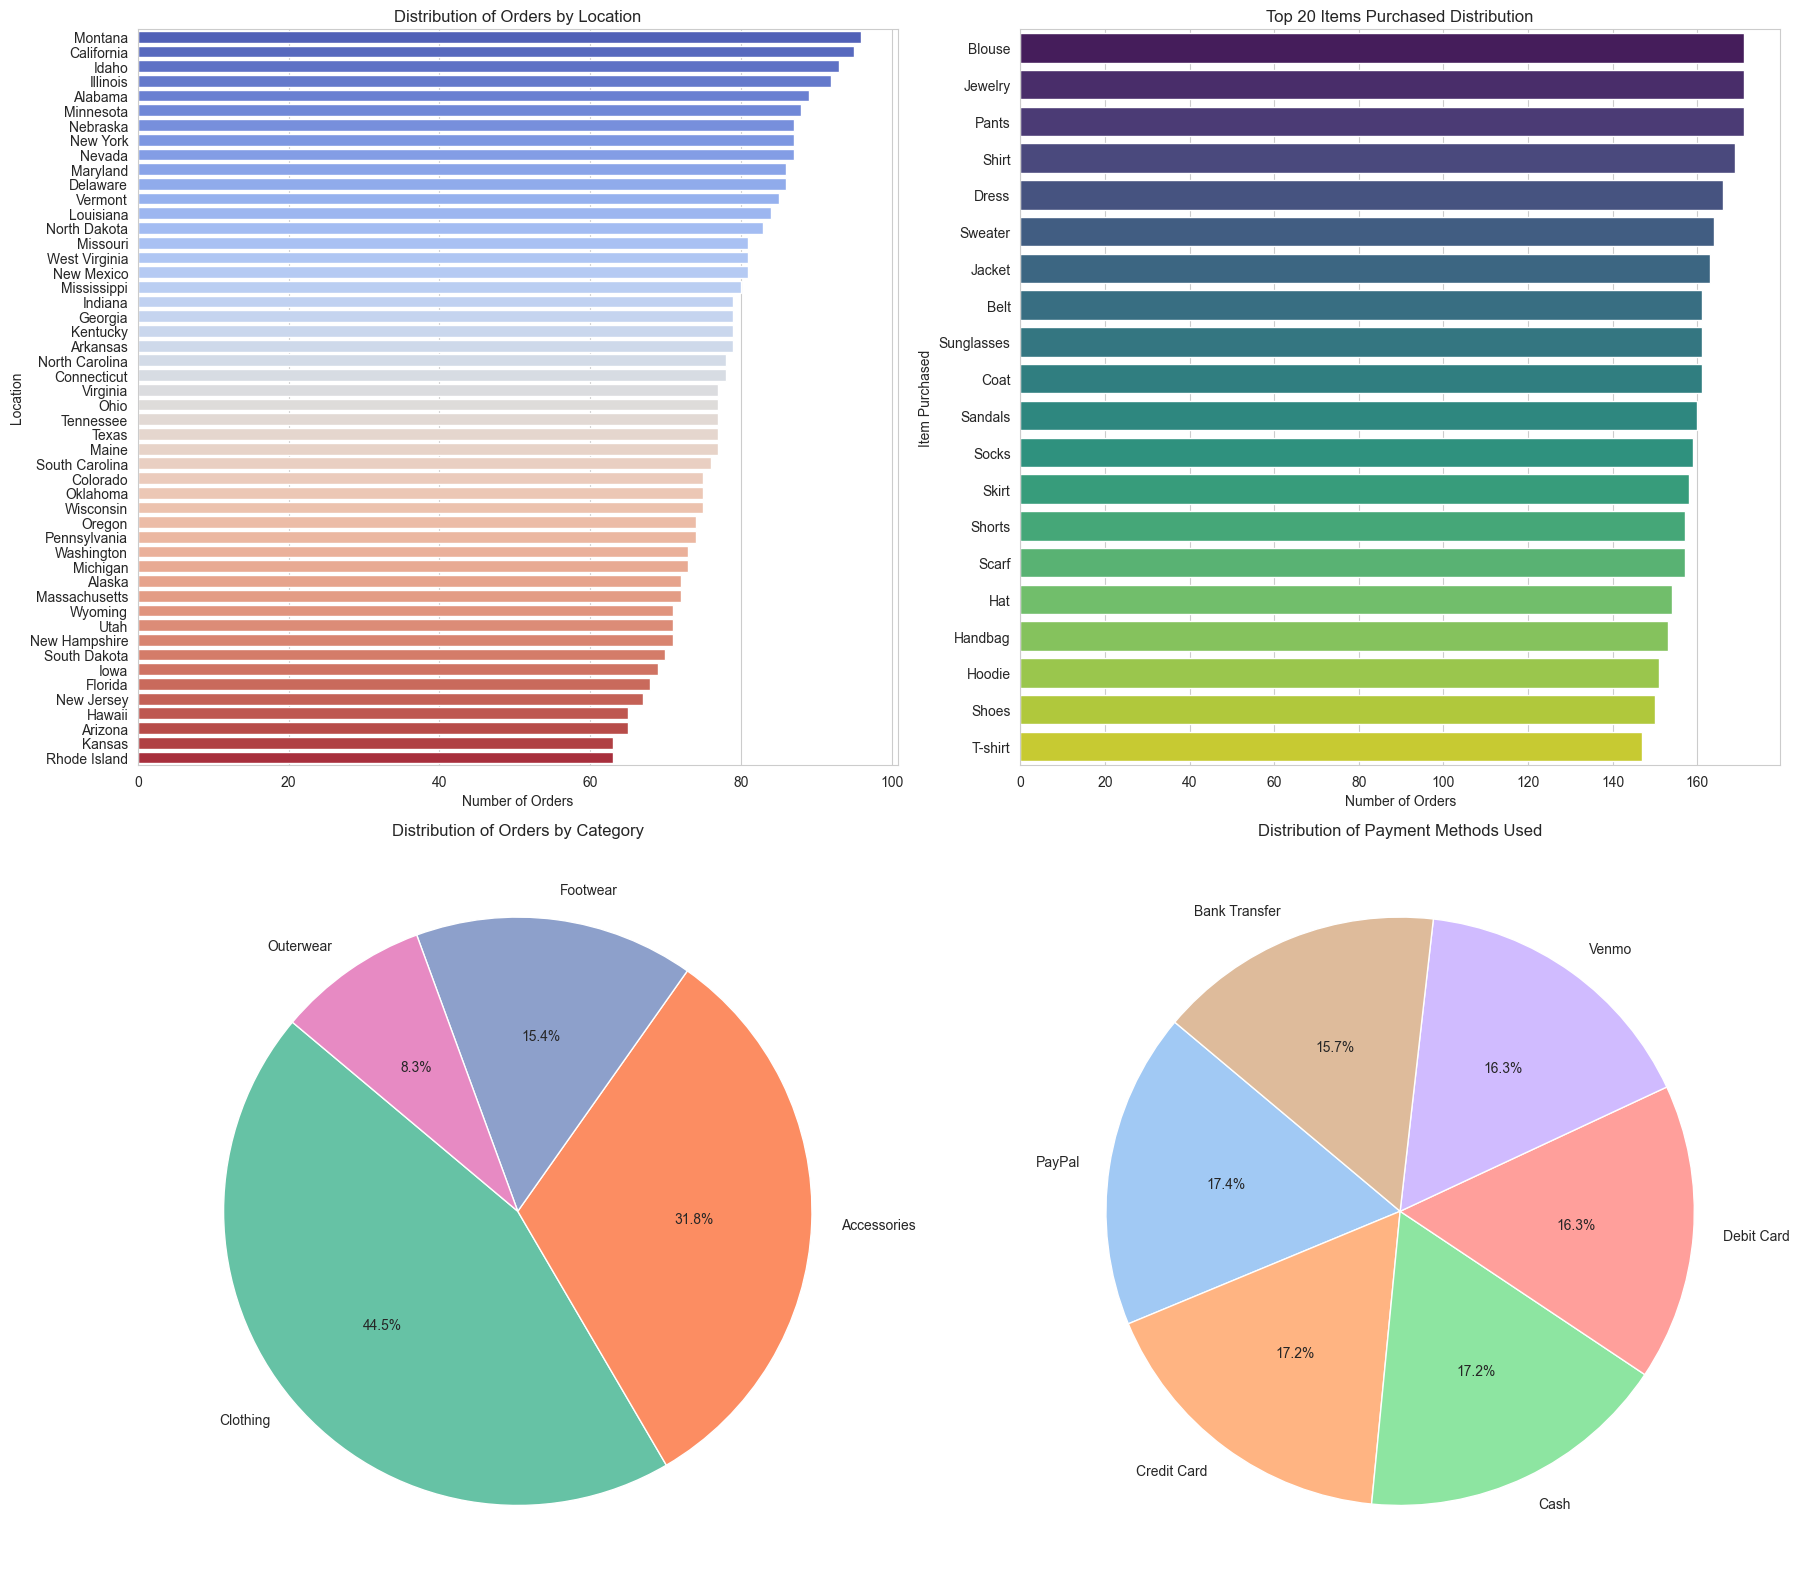

In [27]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the plots for the distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Location Distribution Plot
sns.barplot(x=location_distribution.values, y=location_distribution.index, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title('Distribution of Orders by Location')
axes[0, 0].set_xlabel('Number of Orders')
axes[0, 0].set_ylabel('Location')

# Item Purchased Distribution Plot
item_purchased_distribution = item_purchased_distribution.iloc[:20]  # Limiting to top 20 items for better visualization
sns.barplot(x=item_purchased_distribution.values, y=item_purchased_distribution.index, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Top 20 Items Purchased Distribution')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Item Purchased')

# Category Distribution Plot
category_colors = sns.color_palette('Set2')
axes[1, 0].pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=category_colors)
axes[1, 0].set_title('Distribution of Orders by Category')

# Payment Method Distribution Plot
payment_method_colors = sns.color_palette('pastel')
axes[1, 1].pie(payment_method_distribution, labels=payment_method_distribution.index, autopct='%1.1f%%', startangle=140, colors=payment_method_colors)
axes[1, 1].set_title('Distribution of Payment Methods Used')

plt.tight_layout()
plt.show()

The correlation matrix for the (Age, Review Rating, Purchase Amount, and Previous Purchases) 

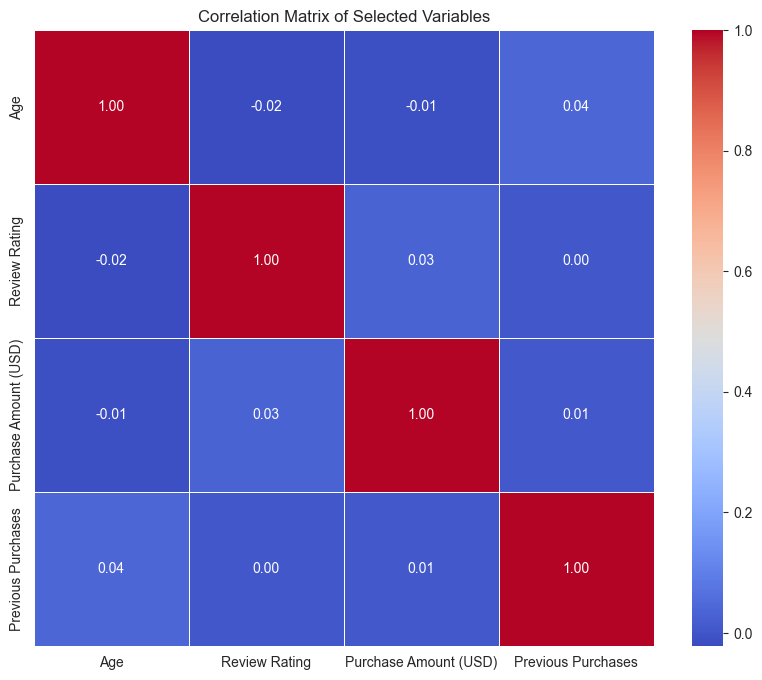

In [28]:
# Calculating the correlation matrix for selected variables: 'Age', 'Review Rating', 'Purchase Amount (USD)', and 'Previous Purchases'
selected_columns = data[['Age', 'Review Rating', 'Purchase Amount (USD)', 'Previous Purchases']]
correlation_matrix = selected_columns.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()